In [1]:
# Imported Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from figure_labeler import *

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 style="text-align:center;">Factors for having Lung Cancer</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

[ref5]: #dat_expl
- [Data Exploration][ref5]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary
***

-  Mandated a research with the goal of reducing lung cancer within the local area.
-  Using heatmap the researcher discover different correlation which can be found at the Data exploration
-  Discover that a high risk level of lung cancer is positively correlated with Air Pollution, Dust allergies, and Chronic Lung Disease
-  Recommends to utilize allergy medication, stricter laws with regard to smoking within public areas.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement
***

 - To find some meaningful correlations between the provided data.

 - To compare the results between x-variables.

 - To find insights and recommendations with the observations.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation
***

Our motivation for undergoing this research and exploratory data analysis is improving the health of the populace due to an increased rate of lung cancer within the local area through a mandate from the government

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source
***

This dataset is obtained from the kaggle website https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

Data Dictionary

 - Level (integer) - Level of cancer (Low, Medium, High)
 - Chronic Lung Disease (integer) - The level of chronic lung disease
 - Dust Allergy (integer) -  The level of dust allergy of the patient
 - Air Pollution (integer) - The level of air pollution exposure of the patient

[ref]: #top
[Back to Table of Contents][ref]

In [2]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('cancer patient data sets.csv')

In [4]:
fl.table_caption("Dataset 1", "Original Dataframe")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


<a name="dat_prep"></a>
## Data Preprocessing
***

The dataset obtained has undergone multiple forms of data engineering with the levels of low, medium and high being converted into 1, 2, 3. Another is the removal of the Index and Patient Id columns. Finally, the data was further trimmed through the selection of specific columns to undergo heatmap and pairplot.

[ref]: #top
[Back to Table of Contents][ref]

In [5]:
#Replace string underlevel to numerical
df = df.replace(['Low','Medium','High'],[1,2,3])

In [6]:
#Drop Index and Patient ID because they have no use for this analysis
df.drop('index', inplace=True, axis=1)
df.drop('Patient Id', inplace=True, axis=1)

In [7]:
d_age = df[["Age", "Dust Allergy", "Air Pollution",  "chronic Lung Disease", "Passive Smoker", "Smoking", "Level"]]

<a name="dat_expl"></a>
## Data Exploration


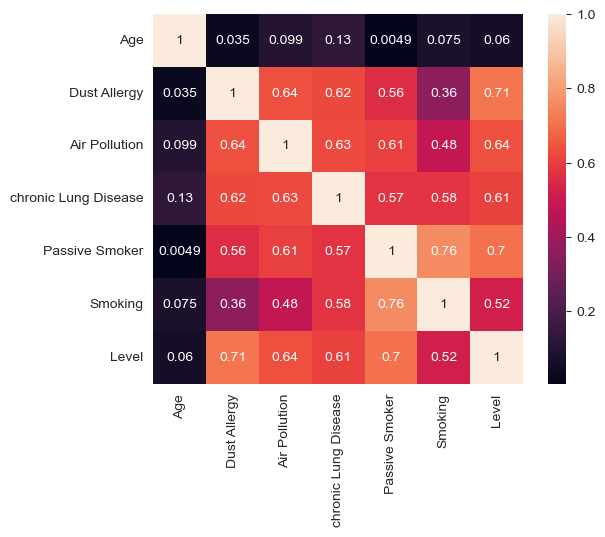

In [8]:
fl.fig_caption("Heat Map",
               "To check for strong correlation between variables")
sns.heatmap(d_age.corr(), annot=True, square= True)
plt.show()

In [9]:
d_age = df[["Dust Allergy", "Air Pollution",  "chronic Lung Disease", "Level"]]

fl.table_caption("Dataset 2","Dataframe used for this EDA")
d_age.head()

,Dust Allergy,Air Pollution,chronic Lung Disease,Level
0,5,2,2,1
1,5,3,2,2
2,6,4,4,3
3,7,7,7,3
4,7,6,6,3


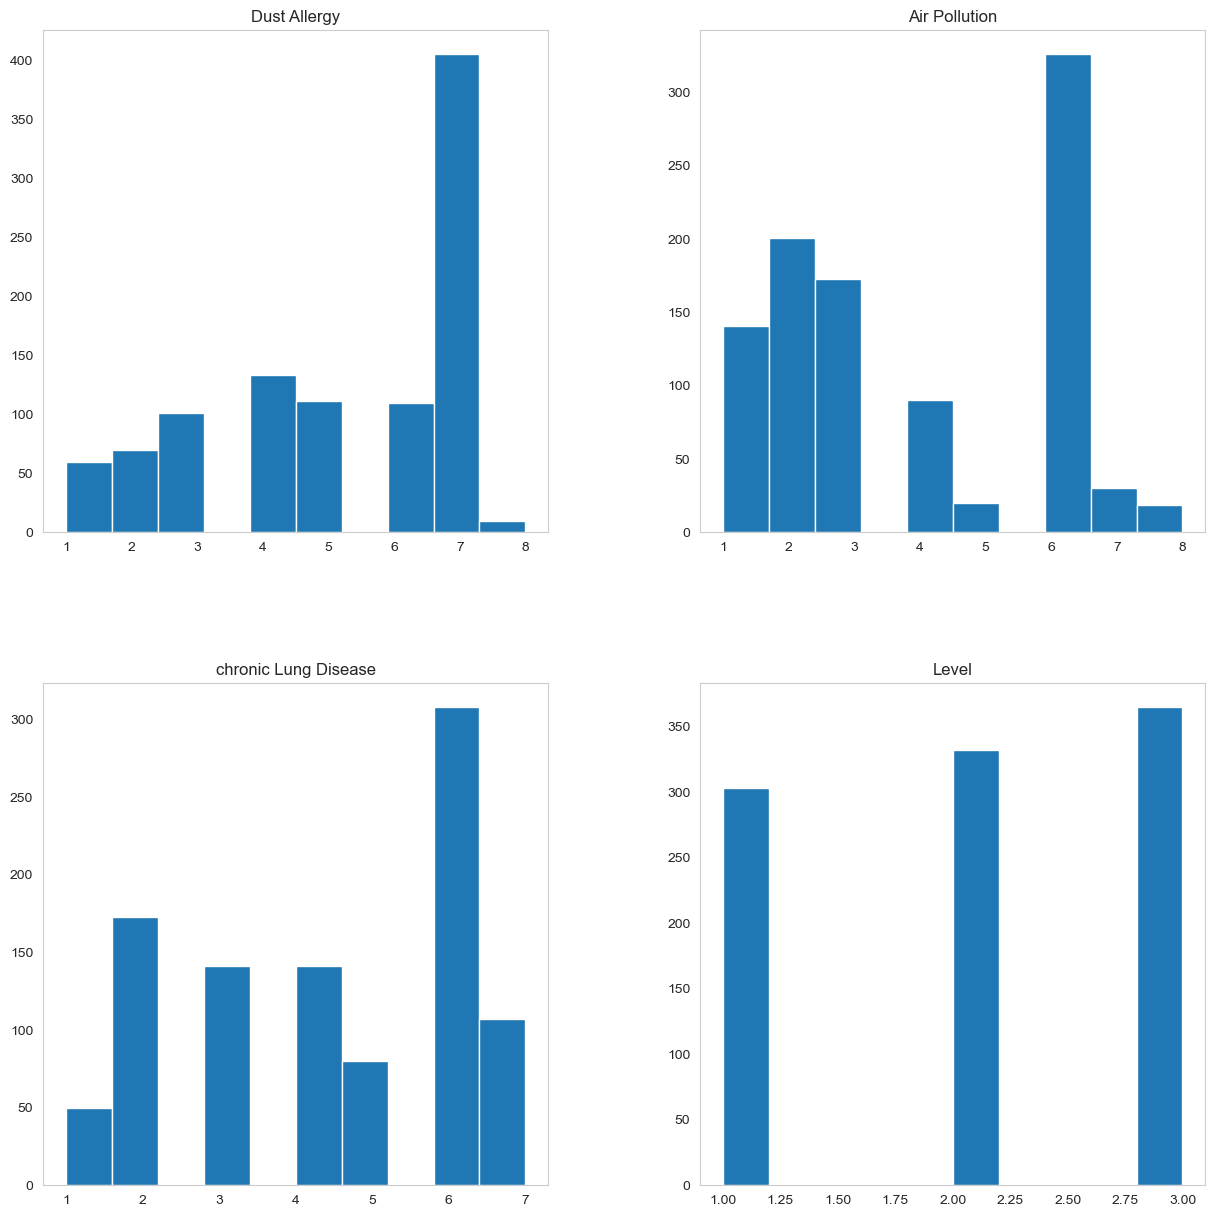

In [10]:
fl.fig_caption("Histograms","To inspect the balance between responses")
d_age.hist(figsize=[15, 15], grid=False)
plt.show()

In [11]:
counts = df["Gender"].value_counts()
percent100 = df["Gender"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
cancer_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(cancer_conditions)

   counts Percent
1     598   59.8%
2     402   40.2%


In here we also checked if the distribution between genders are equal.

<Figure size 1000x600 with 0 Axes>

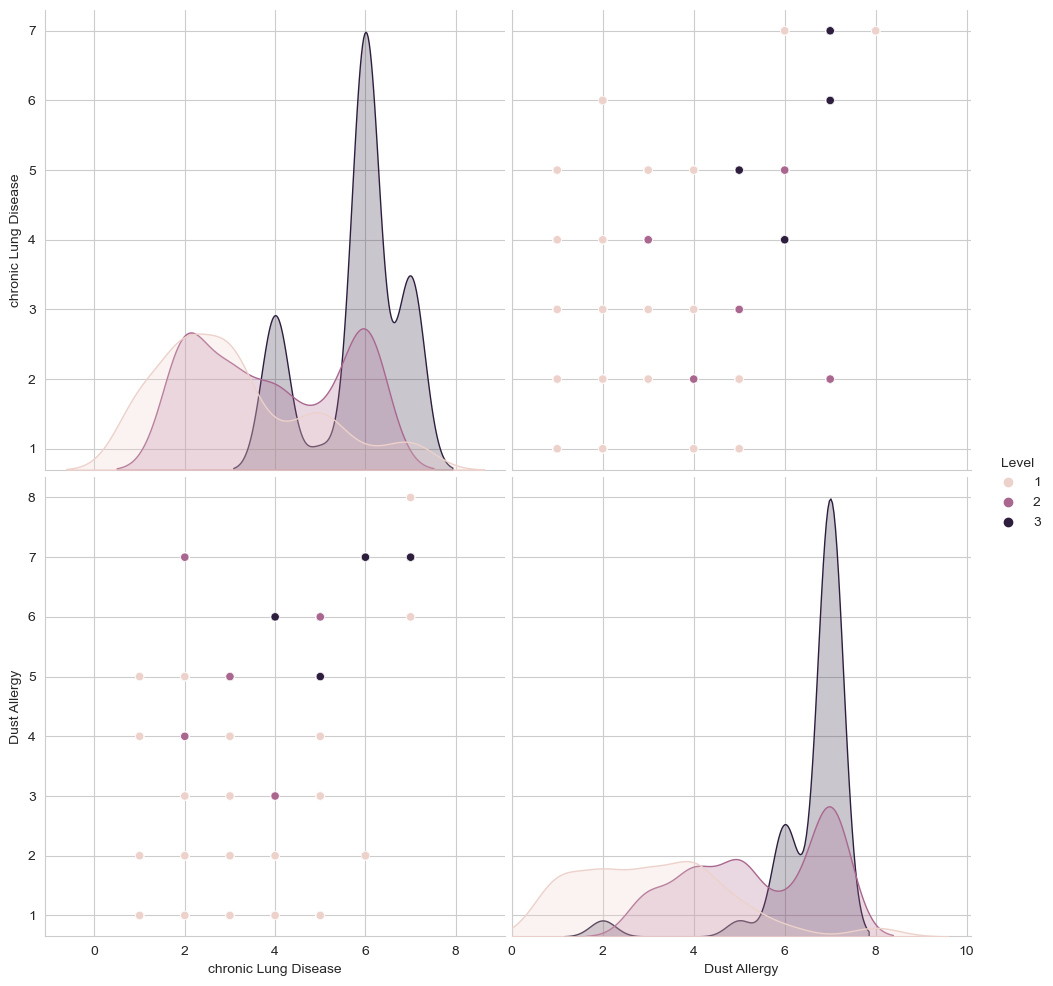

In [12]:
fl.fig_caption("Pairplot 1","For comparing the concentration of responses between Chronic Lung Disease, Level, and Dust Allergy.")

plt.figure(figsize=(10, 6))
numeric_features = df[["chronic Lung Disease", "Level", "Dust Allergy"]]
sns.set_style("whitegrid")
sns.pairplot(numeric_features, hue="Level", height=5)
plt.xlim(0, None)
plt.ylim(0, None)
plt.show()

<Figure size 1000x600 with 0 Axes>

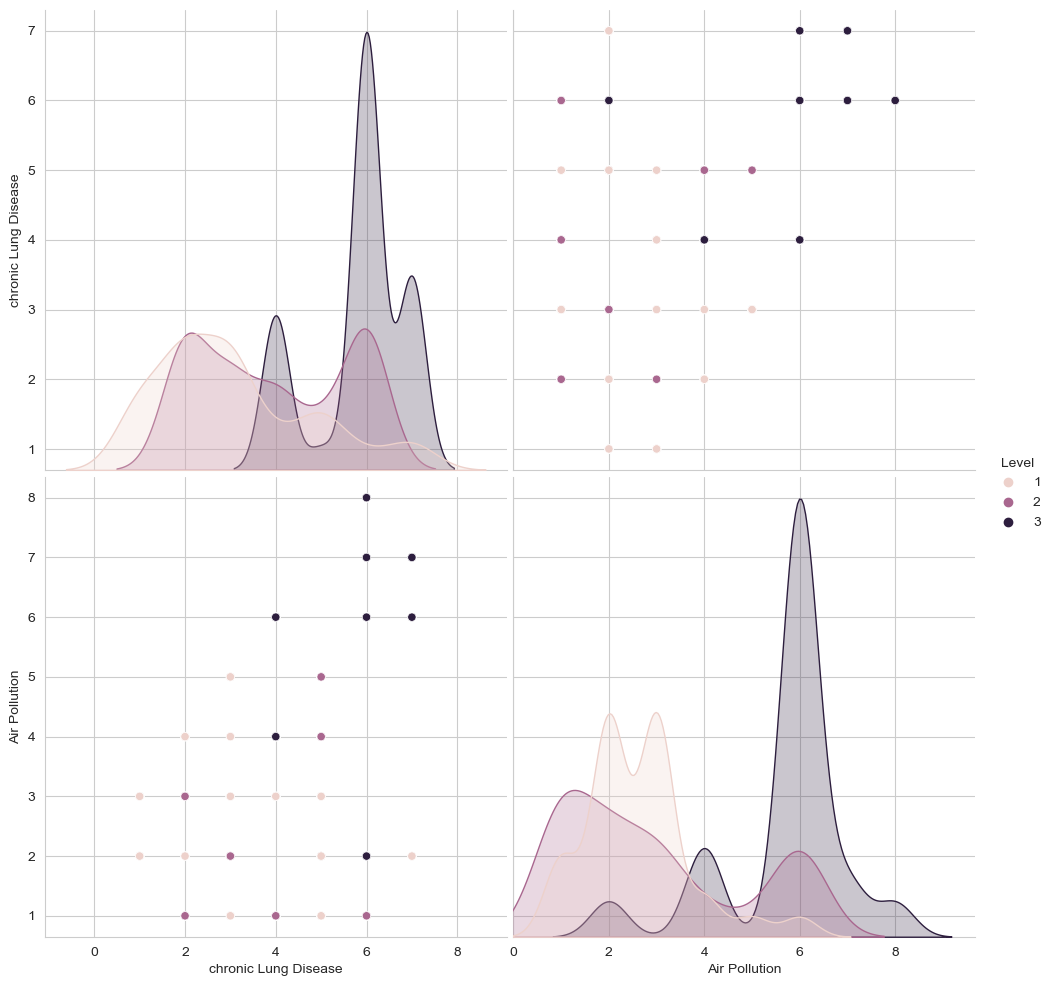

In [13]:
fl.fig_caption("Pairplot 2","For comparing the concentration of responses between Chronic Lung Disease, Level, and Air Pollution.")

plt.figure(figsize=(10, 6))
numeric_features = df[["chronic Lung Disease", "Level", "Air Pollution"]]
sns.set_style("whitegrid")
sns.pairplot(numeric_features, hue="Level", height=5)
plt.xlim(0, None)
plt.ylim(0, None)
plt.show()


[ref]: #top
[Back to Table of Contents][ref]


<a name="res_dis"></a>
## Results and Discussions
***
Based on our observations, we have found there is a positive correlation between high risk level of lung cancer and air pollution and dust allergies. On the same note, high risk level of lung cancer is positively correlated with chronic lung disease. 

Another observation is that patients at higher risk are more exposed to air pollutants, and have severe dust allergies.

[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
***

### Conclusions

High risk level of lung cancer is positively correlated with Air Pollution and Dust Allergies.

High risk level of lung cancer  is positively correlated with Chronic Lung disease.

The pair plot observations provided that patients with High risk (level 3), have much exposure to air pollutants and have severe dust allergies.

### Recommendations

Recommendations include subsidizing for allergy medications, stricter laws with regards to smoking within public areas.

Causes of Air pollution such as cars, factories and other industries should be reduced. 

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
***

https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

[ref]: #top
[Back to Table of Contents][ref]